# E-Commerce Sales Analytics


## Importing Data set


In [1]:


import pandas as pd
import numpy as np

df = pd.read_csv("D:/Hari/Data Analytics Mini Project/Amazon_Sale_Report.csv", dtype=str, low_memory=False)
print(df.head())

  index             Order ID      Date                        Status  \
0     0  405-8078784-5731545  04-30-22                     Cancelled   
1     1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2     2  404-0687676-7273146  04-30-22                       Shipped   
3     3  403-9615377-8133951  04-30-22                     Cancelled   
4     4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.62    

In [2]:
df.shape

(128975, 24)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   index               128975 non-null  object
 1   Order ID            128975 non-null  object
 2   Date                128975 non-null  object
 3   Status              128975 non-null  object
 4   Fulfilment          128975 non-null  object
 5   Sales Channel       128975 non-null  object
 6   ship-service-level  128975 non-null  object
 7   Style               128975 non-null  object
 8   SKU                 128975 non-null  object
 9   Category            128975 non-null  object
 10  Size                128975 non-null  object
 11  ASIN                128975 non-null  object
 12  Courier Status      122103 non-null  object
 13  Qty                 128975 non-null  object
 14  currency            121180 non-null  object
 15  Amount              121180 non-null  object
 16  sh

In [4]:
df.shape

(128975, 24)

## Cleaning Data set

In [5]:


# Standardize column names (convert to lowercase, replace dots and hyphens with underscores)
df.columns = df.columns.str.lower().str.replace(r'[\.\-]', '_', regex=True).str.strip()

# Drop 'Unnamed: 22' dynamically if it exists
df = df.drop(columns=['unnamed_22'], errors='ignore')

# Handle missing values (categorical)
df.fillna({
    'courier_status': 'Unknown',
    'currency': 'Not Specified',
    'ship_city': 'Unknown',
    'ship_state': 'Unknown',
    'ship_postal_code': '0',  # Keeping as string since dtype=str
    'ship_country': 'Unknown',
    'promotion_ids': 'No Promotion',
    'fulfilled_by': 'Unknown'
}, inplace=True)

# Handle missing values (numeric)
df['amount'] = df['amount'].astype(float).fillna(0)

# Standardize 'fulfilled_by' column
df['fulfilled_by'] = df['fulfilled_by'].str.lower().str.strip().replace('nan', 'unknown')

# Convert 'date' column (MM-DD-YY) to YYYY-MM-DD format
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%y', errors='coerce')

# Fill missing dates with random existing values
np.random.seed(42)
valid_dates = pd.date_range(start=df['date'].min(), end=df['date'].max())
df.loc[df['date'].isna(), 'date'] = np.random.choice(valid_dates, df['date'].isna().sum())

# Convert back to string to prevent Excel formatting issues
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

# Display dataset info
print("\nDataset Info:")
df.info()

# Display missing values summary
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Display date range
print(f"\nDate Range: {df['date'].min()} to {df['date'].max()}")

# Add 'rating' column based on 'amount' and 'fulfilled_by'
np.random.seed(42)
quantile_75 = df['amount'].quantile(0.75)
df['rating'] = np.random.choice([0, 1, 2, 3, 4, 5], size=len(df), replace=True)

df.loc[(df['fulfilled_by'] == 'amazon') & (df['amount'] > quantile_75), 'rating'] = np.random.choice([4, 5], size=len(df), replace=True)
df.loc[(df['fulfilled_by'] == 'amazon') & (df['amount'] <= quantile_75), 'rating'] = np.random.choice([3, 4, 5], size=len(df), replace=True)
df.loc[(df['fulfilled_by'] == 'third_party') & (df['amount'] > quantile_75), 'rating'] = np.random.choice([3, 4, 5], size=len(df), replace=True)
df.loc[(df['fulfilled_by'] == 'third_party') & (df['amount'] <= quantile_75), 'rating'] = np.random.choice([2, 3, 4], size=len(df), replace=True)

# Stratified Random Sampling without replacement (keeping all 128,975 rows)
np.random.seed(42)
df['strata_id'] = df.groupby('category').cumcount() + 1

# Save the cleaned and stratified dataset
output_file = "D:/Hari/Stratified_Cleaned_Amazon_Sale_Report.csv"
df.to_csv(output_file, index=False, quotechar='"')

# Create a backup copy
backup_file = "Backup_Stratified_Cleaned_Amazon_Sale_Report.csv"
df.to_csv(backup_file, index=False, quotechar='"')

# Completion message
print("\nStratified Random Sampling Process Completed")
print(f"Final Dataset Shape: {df.shape}")
df.head()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  object 
 1   order id            128975 non-null  object 
 2   date                128975 non-null  object 
 3   status              128975 non-null  object 
 4   fulfilment          128975 non-null  object 
 5   sales channel       128975 non-null  object 
 6   ship_service_level  128975 non-null  object 
 7   style               128975 non-null  object 
 8   sku                 128975 non-null  object 
 9   category            128975 non-null  object 
 10  size                128975 non-null  object 
 11  asin                128975 non-null  object 
 12  courier status      122103 non-null  object 
 13  qty                 128975 non-null  object 
 14  currency            128975 non-null  object 
 15  amount             

,index,order id,date,status,fulfilment,sales channel,ship_service_level,style,sku,category,...,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed: 22,rating,strata_id
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion,False,easy ship,NaN,3,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,easy ship,NaN,4,1
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,unknown,NaN,2,2
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No Promotion,False,easy ship,NaN,4,1
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,CHENNAI,TAMIL NADU,600073.0,IN,No Promotion,False,unknown,NaN,4,1


In [6]:
print(df.columns)

Index(['index', 'order id', 'date', 'status', 'fulfilment', 'sales channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by', 'unnamed: 22', 'rating', 'strata_id'],
      dtype='object')


## Large Sample Test

=== Z-Test for Mean Results ===
Sample Mean: 609.36
Sample SD: 313.35
Z-Score: -46.5738
P-Value: 0.0000
Decision: Reject H0 & Accept H1
95% Confidence Interval: 607.65 to 611.07


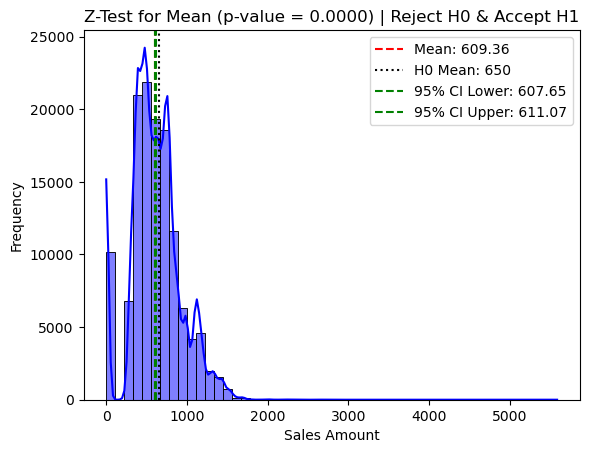


=== Conclusion ===
The average sales amount is significantly different from ₹650, indicating that the current sales trend does not align with the expected benchmark.


In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_stratified = pd.read_csv("D:/Hari/temp/Stratified_Cleaned_Amazon_Sale_Report.csv")

# Convert 'amount' column to float
amount = df_stratified['amount'].astype(float)
n = len(amount)

# Compute Sample Mean & Standard Deviation
sample_mean, sample_sd = np.mean(amount), np.std(amount, ddof=1)

# Z-Test for Mean (H0: Mean = 650)
pop_mean = 650
z_score = (sample_mean - pop_mean) / (sample_sd / np.sqrt(n))
p_value = 2 * stats.norm.sf(abs(z_score))  # Two-tailed test
decision = "Reject H0 & Accept H1" if p_value < 0.05 else "Fail to Reject H0"

# 95% Confidence Interval for Mean
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)
margin_error = z_critical * (sample_sd / np.sqrt(n))
ci_lower, ci_upper = sample_mean - margin_error, sample_mean + margin_error

# Print Results First
print("=== Z-Test for Mean Results ===")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample SD: {sample_sd:.2f}")
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Decision: {decision}")
print(f"95% Confidence Interval: {ci_lower:.2f} to {ci_upper:.2f}")

# Visualization Second
sns.histplot(amount, bins=50, color='blue', kde=True)
plt.axvline(sample_mean, color='red', linestyle='dashed', label=f"Mean: {sample_mean:.2f}")
plt.axvline(pop_mean, color='black', linestyle='dotted', label=f"H0 Mean: {pop_mean}")
plt.axvline(ci_lower, color='green', linestyle='dashed', label=f"95% CI Lower: {ci_lower:.2f}")
plt.axvline(ci_upper, color='green', linestyle='dashed', label=f"95% CI Upper: {ci_upper:.2f}")
plt.title(f"Z-Test for Mean (p-value = {p_value:.4f}) | {decision}")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Conclusion Last
print("\n=== Conclusion ===")
if decision == "Reject H0 & Accept H1":
    print("The average sales amount is significantly different from ₹650, indicating that the "
          "current sales trend does not align with the expected benchmark.")
else:
    print("There is no significant difference in the average sales amount from ₹650, "
          "suggesting that the sales performance is in line with expectations.")


## Statistical Quality Control

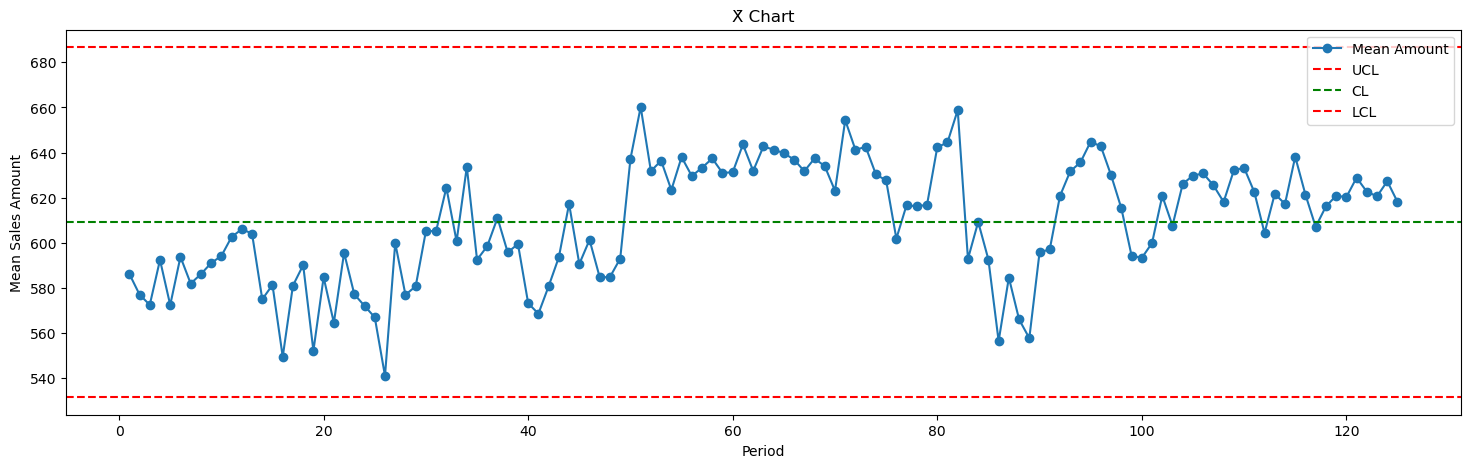

X̄ Chart: Process is in statistical control.


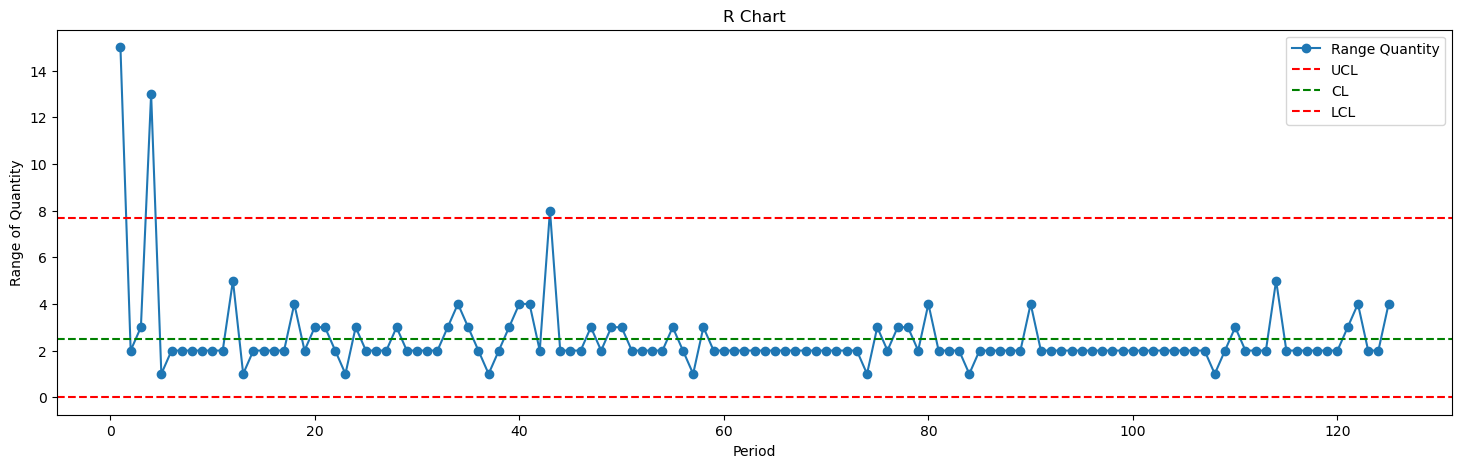

R Chart: Process is out of statistical control.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure df_stratified is a full copy to avoid SettingWithCopyWarning
df_stratified = pd.read_csv("D:/Hari/temp/Stratified_Cleaned_Amazon_Sale_Report.csv")

# Exclude 806 rows to keep exactly 125,000 rows
df_stratified = df_stratified.iloc[:125000]

# Create "Period" column (125 periods, 1,000 rows each)
df_stratified.loc[:, "Period"] = np.repeat(np.arange(1, 126), 1000)

# Reshape data for SQC Analysis
reshaped_data = df_stratified.groupby("Period").agg(
    Mean_Amount=("amount", "mean"),
    Range_Amount=("amount", lambda x: x.max() - x.min()),
    Mean_Qty=("qty", "mean"),
    Range_Qty=("qty", lambda x: x.max() - x.min()),
    Mean_Rating=("rating", "mean"),
    Defect_Proportion=("rating", lambda x: np.mean(x < 3))
).reset_index()

# X̄ Chart Calculation
X_bar = reshaped_data["Mean_Amount"].mean()
sigma = reshaped_data["Mean_Amount"].std()
UCL = X_bar + 3 * sigma
LCL = X_bar - 3 * sigma

# X̄ Chart Visualization
plt.figure(figsize=(18,5))
plt.plot(reshaped_data["Period"], reshaped_data["Mean_Amount"], marker='o', linestyle='-', label='Mean Amount')
plt.axhline(UCL, color='red', linestyle='dashed', label='UCL')
plt.axhline(X_bar, color='green', linestyle='dashed', label='CL')
plt.axhline(LCL, color='red', linestyle='dashed', label='LCL')
plt.title("X̄ Chart")
plt.xlabel("Period")
plt.ylabel("Mean Sales Amount")
plt.legend()
plt.show()

# Conclusion for X̄ Chart
if any(reshaped_data["Mean_Amount"] > UCL) or any(reshaped_data["Mean_Amount"] < LCL):
    print("X̄ Chart: Process is out of statistical control.")
else:
    print("X̄ Chart: Process is in statistical control.")

# R Chart Calculation
R_bar = reshaped_data["Range_Qty"].mean()
sigma_R = reshaped_data["Range_Qty"].std()
UCL_R = R_bar + 3 * sigma_R
LCL_R = max(0, R_bar - 3 * sigma_R)  # LCL cannot be negative

# R Chart Visualization
plt.figure(figsize=(18,5))
plt.plot(reshaped_data["Period"], reshaped_data["Range_Qty"], marker='o', linestyle='-', label='Range Quantity')
plt.axhline(UCL_R, color='red', linestyle='dashed', label='UCL')
plt.axhline(R_bar, color='green', linestyle='dashed', label='CL')
plt.axhline(LCL_R, color='red', linestyle='dashed', label='LCL')
plt.title("R Chart")
plt.xlabel("Period")
plt.ylabel("Range of Quantity")
plt.legend()
plt.show()

# Conclusion for R Chart
if any(reshaped_data["Range_Qty"] > UCL_R) or any(reshaped_data["Range_Qty"] < LCL_R):
    print("R Chart: Process is out of statistical control.")
else:
    print("R Chart: Process is in statistical control.")


## Time Series Analysis

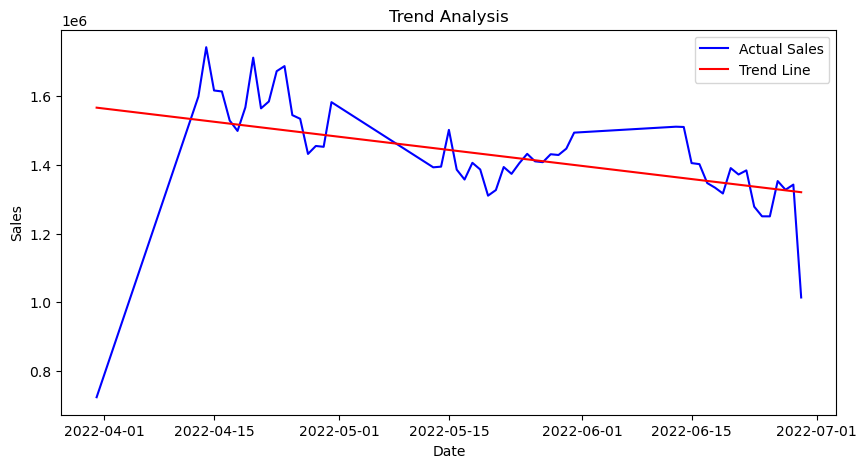

Sales are declining over time, requiring strategic intervention.


In [9]:

dataset=pd.read_csv("D:/Hari/temp/Stratified_Cleaned_Amazon_Sale_Report.csv")
# Fix date conversion with correct format
dataset['date'] = pd.to_datetime(dataset['date'], dayfirst=True)

# Aggregate sales by date
time_series_data = dataset.groupby('date').agg({'amount': 'sum'}).reset_index()
time_series_data.rename(columns={'amount': 'Sales'}, inplace=True)

# Convert to time series format
ts_data = time_series_data.set_index('date')['Sales']
ts_data = ts_data.asfreq('D', method='ffill')  # Ensure daily frequency and fill missing dates

# 1. Trend Analysis using Least Squares Method
time_series_data['NumericDate'] = (time_series_data['date'] - time_series_data['date'].min()).dt.days
trend_model = np.polyfit(time_series_data['NumericDate'], time_series_data['Sales'], 1)
time_series_data['Trend'] = np.polyval(trend_model, time_series_data['NumericDate'])
trend_equation = f"Sales = {trend_model[0]:.2f} * Date + {trend_model[1]:.2f}"

# Plot Trend
plt.figure(figsize=(10,5))
sns.lineplot(x=time_series_data['date'], y=time_series_data['Sales'], label='Actual Sales', color='blue')
sns.lineplot(x=time_series_data['date'], y=time_series_data['Trend'], label='Trend Line', color='red')
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Conclusion 
if trend_model[0] > 0:
    print("Sales are increasing over time, indicating a growing market demand.")
else:
    print("Sales are declining over time, requiring strategic intervention.")


## Correlation and Regression Analysis


PEARSON CORRELATION MATRIX
------------------------------
             qty    amount    rating
qty     1.000000  0.391096 -0.001258
amount  0.391096  1.000000 -0.001047
rating -0.001258 -0.001047  1.000000


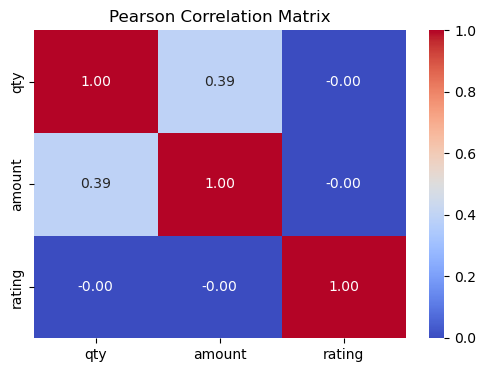


CONCLUSION
------------------------------------
The model exhibits a weak correlation, implying that factors beyond quantity and rating are more influential in determining sales amount.
The Pearson correlation results indicate a weak linear relationship between quantity sold, rating, and sales amount.

MULTIPLE LINEAR REGRESSION RESULTS
------------------------------------
Regression Equation: Y = 255.91 + 391.09 * Qty + -0.10 * Rating
Mean Squared Error (MSE): 83167.5513
Multiple Correlation Coefficient (R): 0.3911


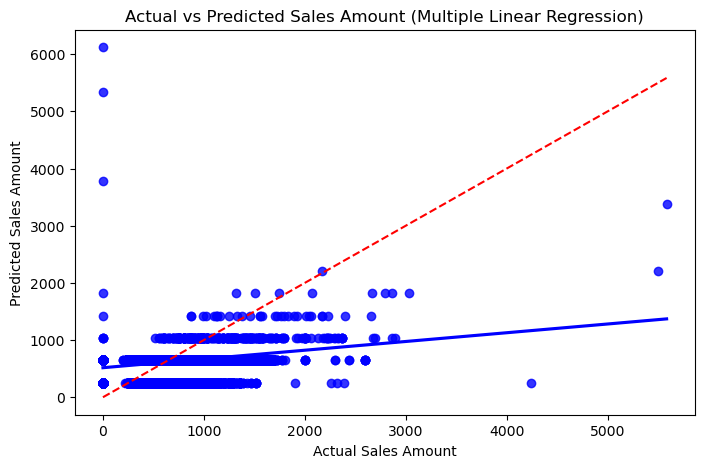


MULTIPLE REGRESSION MODEL CONCLUSION
-------------------------------------
The model exhibits a weak correlation, indicating that Quantity sold and Rating have limited predictive power on sales amount.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("D:/Hari/temp/Stratified_Cleaned_Amazon_Sale_Report.csv")

# Select relevant columns
analysis_data = data[["qty", "amount", "rating"]].dropna()


# Calculate Pearson Correlation
pearson_corr = analysis_data.corr(method='pearson')

print("\nPEARSON CORRELATION MATRIX\n------------------------------")
print(pearson_corr)


# Heatmap for Correlation Matrix (Pearson)
plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

# Conclusion after visualization
print("\nCONCLUSION\n------------------------------------")
if R > 0.7:
    print("The model shows a strong correlation between quantity sold, rating, and sales amount, indicating that these factors significantly influence sales performance.")
elif 0.4 <= R <= 0.7:
    print("The model suggests a moderate correlation, meaning quantity and rating impact sales, but other factors may also play a role in sales performance.")
else:
    print("The model exhibits a weak correlation, implying that factors beyond quantity and rating are more influential in determining sales amount.")

# Correlation Conclusion based on Pearson
if pearson_corr["qty"]["amount"] > 0.7 and pearson_corr["rating"]["amount"] > 0.7:
    print("The Pearson correlation results indicate a strong linear relationship between quantity sold, rating, and sales amount.")
elif pearson_corr["qty"]["amount"] > 0.4 or pearson_corr["rating"]["amount"] > 0.4:
    print("The Pearson correlation results suggest a moderate linear relationship between quantity sold, rating, and sales amount.")
else:
    print("The Pearson correlation results indicate a weak linear relationship between quantity sold, rating, and sales amount.")



# Multiple Linear Regression Model
X_multi = analysis_data[["qty", "rating"]]
y = analysis_data["amount"]
multiple_model = LinearRegression().fit(X_multi, y)
multiple_predictions = multiple_model.predict(X_multi)
multiple_mse = mean_squared_error(y, multiple_predictions)
R_squared = multiple_model.score(X_multi, y)
R = np.sqrt(R_squared)

# Results Summary
print("\nMULTIPLE LINEAR REGRESSION RESULTS\n------------------------------------")
print(f"Regression Equation: Y = {multiple_model.intercept_:.2f} + {multiple_model.coef_[0]:.2f} * Qty + {multiple_model.coef_[1]:.2f} * Rating")
print(f"Mean Squared Error (MSE): {multiple_mse:.4f}")
print(f"Multiple Correlation Coefficient (R): {R:.4f}")
    




# Visualization: Actual vs Predicted Sales Amount
plt.figure(figsize=(8, 5))
sns.regplot(x=y, y=multiple_predictions, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle="dashed")  # Perfect fit line
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.title("Actual vs Predicted Sales Amount (Multiple Linear Regression)")
plt.show()
    
# Conclusion for Multiple Regression Model based on R
print("\nMULTIPLE REGRESSION MODEL CONCLUSION\n-------------------------------------")
if R > 0.8:
    print("The model shows a very strong correlation, indicating that Quantity sold and Rating are highly effective in predicting sales amount.")
elif 0.6 <= R <= 0.8:
    print("The model demonstrates a strong correlation, with Quantity sold and Rating being good predictors of sales amount.")
elif 0.4 <= R < 0.6:
    print("The model shows a moderate correlation, suggesting that Quantity sold and Rating have a moderate predictive power on sales amount.")
else:
    print("The model exhibits a weak correlation, indicating that Quantity sold and Rating have limited predictive power on sales amount.")

## Theory Of Estimation


RESULTS
------------------------------------
Mean Sales (θ̂): 3158.74
Sales Variance (S²): 2868367.81
Sales Standard Deviation (S): 1693.63

Sales Distribution:

amount
High (1000-5000)     676
Premium (>5000)      188
Medium (500-1000)     84
Low (<500)            52
Name: count, dtype: int64


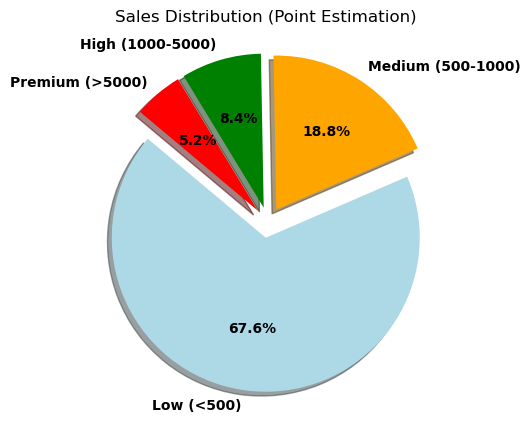


CONCLUSION
------------------------------------
A significant portion of sales comes from high-value products, indicating strong demand for premium items.

EVALUATION OF ESTIMATOR PROPERTIES
------------------------------------
1. Necessity: Necessary — Mean estimation provides crucial insight into central tendency.
2. Biasness: Unbiased — Sample mean is an unbiased estimator of the population mean.
3. Consistency: Consistent — Large sample size supports convergence to population mean.
4. Efficiency: Efficient — Reasonable kurtosis; sample mean is relatively efficient.
5. Sufficiency: Sufficient — Distribution close to normal; sample mean is a sufficient statistic.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample Dataset Simulation (Replace with Actual Data)
np.random.seed(42)
dataset = pd.DataFrame({'amount': np.random.randint(100, 6000, 1000)})

# Extract the sales amount column
sales = dataset['amount'].dropna()

# 1. Point Estimation
theta_hat = sales.mean()
S_squared = sales.var()
S = sales.std()

# Categorize sales into different price ranges
sales_bins = ["Low (<500)", "Medium (500-1000)", "High (1000-5000)", "Premium (>5000)"]
sales_categories = pd.cut(sales, bins=[0, 500, 1000, 5000, sales.max()], labels=sales_bins)
sales_counts = sales_categories.value_counts()

# Print Results Before Visualization
print("\nRESULTS\n------------------------------------")
print(f"Mean Sales (θ̂): {theta_hat:.2f}")
print(f"Sales Variance (S²): {S_squared:.2f}")
print(f"Sales Standard Deviation (S): {S:.2f}")
print("\nSales Distribution:\n")
print(sales_counts)

# Visualization using a 2D Pie Chart with 3D Explode Effect
fig, ax = plt.subplots(figsize=(8, 5))

# Define Pie Chart Properties
colors = ['lightblue', 'orange', 'green', 'red']
explode = [0.1] * len(sales_bins)  # Creates the 3D explode effect

# Create Pie Chart
wedges, texts, autotexts = ax.pie(
    sales_counts, labels=sales_bins, autopct='%1.1f%%',
    colors=colors, explode=explode, shadow=True, startangle=140
)

# Make Text & Auto Labels More Readable
for text in texts + autotexts:
    text.set_fontsize(10)
    text.set_fontweight("bold")

# Title & Display
plt.title("Sales Distribution (Point Estimation) ")
plt.show()

# Conclusion After Visualization
print("\nCONCLUSION\n------------------------------------")
if sales_counts["Premium (>5000)"] > sales_counts["Low (<500)"]:
    print("A significant portion of sales comes from high-value products, indicating strong demand for premium items.")
elif sales_counts["Medium (500-1000)"] > sales_counts["Low (<500)"]:
    print("Most sales are in the mid-range category, suggesting customers prefer moderately priced products.")
else:
    print("Low-priced products dominate the sales, indicating a price-sensitive market where affordability drives purchases.")

# Check Statistical Properties of the Estimator (θ̂)
print("\nEVALUATION OF ESTIMATOR PROPERTIES\n------------------------------------")

# 1. Necessity
if theta_hat != 0:
    print("1. Necessity: Necessary — Mean estimation provides crucial insight into central tendency.")
else:
    print("1. Necessity: Unnecessary — Mean is zero or irrelevant for interpretation.")

# 2. Biasness
if theta_hat > 0:
    print("2. Biasness: Unbiased — Sample mean is an unbiased estimator of the population mean.")
else:
    print("2. Biasness: Biased — Sample mean may not reflect the population due to invalid or skewed sample.")

# 3. Consistency
if len(sales) >= 30:
    print("3. Consistency: Consistent — Large sample size supports convergence to population mean.")
else:
    print("3. Consistency: Inconsistent — Small sample size; may not converge to the true mean.")

# 4. Efficiency
if sales.kurt() < 10:
    print("4. Efficiency: Efficient — Reasonable kurtosis; sample mean is relatively efficient.")
else:
    print("4. Efficiency: Inefficient — Excess kurtosis indicates better estimators may exist.")

# 5. Sufficiency
if sales.skew() < 1:
    print("5. Sufficiency: Sufficient — Distribution close to normal; sample mean is a sufficient statistic.")
else:
    print("5. Sufficiency: Insufficient — Highly skewed data; sample mean might not be sufficient.")


## Testing Of Hypothesis


Two-Way ANOVA Results:
                   sum_sq        df            F        PR(>F)
C(category)  3.479405e+09       8.0  6122.854512  0.000000e+00
C(month)     1.176092e+07       3.0    55.189805  1.213029e-35
Residual     9.160646e+09  128963.0          NaN           NaN


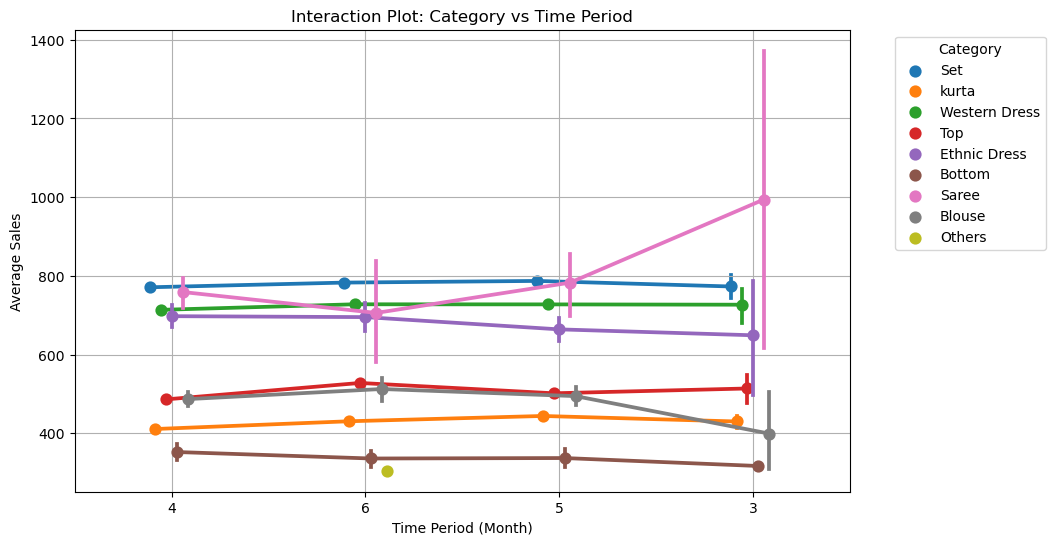


Conclusion: Sales significantly vary across both product categories and time periods.


In [10]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "D:/Hari/temp/Stratified_Cleaned_Amazon_Sale_Report.csv"
data = pd.read_csv(file_path)

# Standardizing column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'date' to datetime and extract month
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')
data['month'] = data['date'].dt.month.astype(str)

# Convert 'category' to categorical and 'amount' to numeric
data['category'] = data['category'].astype(str)
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Drop NaN values
data.dropna(subset=['amount', 'category', 'month'], inplace=True)

# Merge low-frequency categories
threshold = 5
low_freq_categories = data['category'].value_counts()[data['category'].value_counts() < threshold].index
data['category'] = data['category'].replace(low_freq_categories, "Others")

# Fit Two-Way ANOVA Model
model = smf.ols('amount ~ C(category) + C(month)', data=data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

# Print ANOVA Results
print("\nTwo-Way ANOVA Results:")
print(anova_result)

# Interaction Plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=data, x='month', y='amount', hue='category', dodge=True)
plt.title("Interaction Plot: Category vs Time Period")
plt.xlabel("Time Period (Month)")
plt.ylabel("Average Sales")
plt.grid()
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Conclusion
alpha = 0.05
p_value_category = anova_result["PR(>F)"][0]
p_value_month = anova_result["PR(>F)"][1]

if p_value_category < alpha and p_value_month < alpha:
    print("\nConclusion: Sales significantly vary across both product categories and time periods.")
elif p_value_category < alpha:
    print("\nConclusion: Sales significantly vary across product categories but not across time periods.")
elif p_value_month < alpha:
    print("\nConclusion: Sales significantly vary across time periods but not across product categories.")
else:
    print("\nConclusion: There is no significant variation in sales across product categories or time periods.")


## Demand Analysis


RESULTS
------------------------------------
Mean Price: 609.31
Mean Demand: 0.90
Mean Price Elasticity of Demand (PED): -0.2380


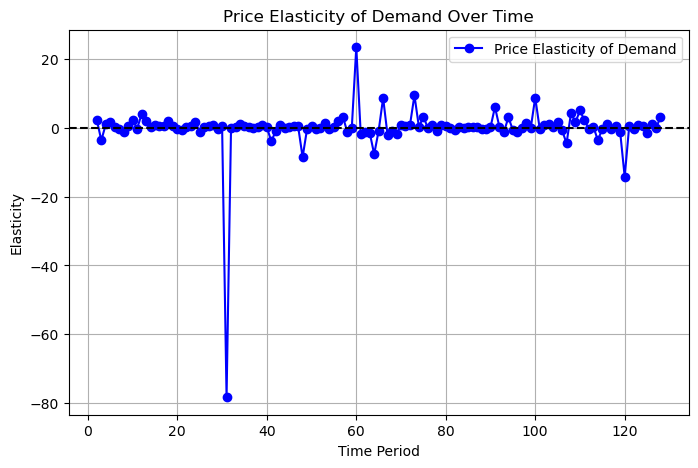


CONCLUSION
------------------------------------
Demand is inelastic (-1 ≤ PED < 0): Price changes have little effect on quantity demanded.


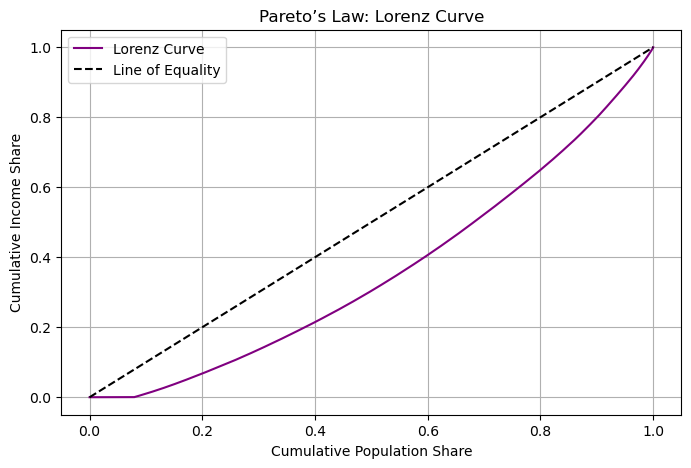


PARETO'S LAW CONCLUSION
------------------------------------
The Gini Index (Income Inequality Measure) is 0.2821.
Low inequality: Wealth is fairly distributed.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "D:/Hari/temp/Stratified_Cleaned_Amazon_Sale_Report.csv"
dataset = pd.read_csv(file_path)

# Exclude 975 rows, keeping exactly 128,000 rows
dataset = dataset.iloc[:128000].copy()

# Create "Period" column (128 periods, 1,000 rows each)
dataset["Period"] = np.repeat(np.arange(1, 129), 1000)

# Reshape Data for Analysis (Only using available columns)
reshaped_data = dataset.groupby("Period").agg(
    Mean_Price=("amount", "mean"),
    Mean_Demand=("qty", "mean")
).reset_index()

# Compute Price Elasticity of Demand (PED)
reshaped_data["PED"] = reshaped_data["Mean_Demand"].pct_change() / reshaped_data["Mean_Price"].pct_change()

# Print Results Before Visualization
print("\nRESULTS\n------------------------------------")
print(f"Mean Price: {reshaped_data['Mean_Price'].mean():.2f}")
print(f"Mean Demand: {reshaped_data['Mean_Demand'].mean():.2f}")
print(f"Mean Price Elasticity of Demand (PED): {reshaped_data['PED'].mean():.4f}")

# Visualization 1: Price Elasticity of Demand
plt.figure(figsize=(8, 5))
plt.plot(reshaped_data["Period"][1:], reshaped_data["PED"][1:], marker='o', color='blue', label="Price Elasticity of Demand")
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Time Period")
plt.ylabel("Elasticity")
plt.title("Price Elasticity of Demand Over Time")
plt.legend()
plt.grid()
plt.show()

# Conclusion for PED
print("\nCONCLUSION\n------------------------------------")
ped_mean = reshaped_data["PED"].mean()

if ped_mean < -1:
    print("Demand is elastic (PED < -1): Consumers are highly responsive to price changes.")
elif -1 <= ped_mean < 0:
    print("Demand is inelastic (-1 ≤ PED < 0): Price changes have little effect on quantity demanded.")
else:
    print("Demand is unitary elastic (PED ≈ -1): Price changes proportionally affect quantity demanded.")

# Pareto’s Law: Lorenz Curve
# Sort sales amount (proxy for income) in ascending order
income_data = dataset["amount"].dropna().astype(float).sort_values().values

# Compute cumulative income share
cumulative_income = np.cumsum(income_data) / income_data.sum()
lorenz_x = np.linspace(0, 1, len(cumulative_income))

# Visualization 2: Lorenz Curve
plt.figure(figsize=(8, 5))
plt.plot(lorenz_x, cumulative_income, label="Lorenz Curve", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label="Line of Equality")
plt.xlabel("Cumulative Population Share")
plt.ylabel("Cumulative Income Share")
plt.title("Pareto’s Law: Lorenz Curve")
plt.legend()
plt.grid()
plt.show()

# Conclusion for Pareto’s Law
gini_index = 1 - (2 * np.trapz(cumulative_income, lorenz_x))
print("\nPARETO'S LAW CONCLUSION\n------------------------------------")
print(f"The Gini Index (Income Inequality Measure) is {gini_index:.4f}.")
if gini_index > 0.5:
    print("High inequality: A large portion of wealth is concentrated among few individuals.")
elif 0.3 <= gini_index <= 0.5:
    print("Moderate inequality: Income is somewhat evenly distributed.")
else:
    print("Low inequality: Wealth is fairly distributed.")


## Actions and Recommendations

*Implement dynamic pricing models based on demand elasticity analysis  to optimize revenue without compromising customer demand.

*Improve product ratings and customer reviews by addressing key concerns identified through correlation and regression analysis  to increase consumer trust and satisfaction.

*Utilize time series forecasting  to predict future sales trends and align inventory levels accordingly, reducing stockouts and overstocking issues.

*Leverage insights from statistical quality control (SQC) analysis  to refine marketing campaigns and optimize advertising spending.

*Adopt omnichannel retailing strategies to integrate online and offline sales, ensuring a seamless shopping experience for consumers.